### Data Visualizations Using Bar And Scatter Plots


#### DataSet Used: 
This directory contains the <a href="https://github.com/fivethirtyeight/data/tree/master/fandango" target="_blank">Data</a> behind the story  **Be Suspicious Of Online Movie Ratings, Especially Fandango’s**
    

#### Data Details:
| Column      | Definition |
| :---------- | :--------- |
| FILM      | Film name       |
| RT_user_norm   | Average user rating from Rotten Tomatoes, normalized to a 1 to 5 point scale|
| Metacritic_user_nom      | Average user rating from Metacritic, normalized to a 1 to 5 point scale       |
| IMDB_norm   | Average user rating from IMDB, normalized to a 1 to 5 point scale        |
| Fandango_Ratingvalue      | average user rating from Fandango, normalized to a 1 to 5 point scale|
| Fandango_Stars   | The rating displayed on the Fandango website (rounded to nearest star, 1 to 5 point scale)|



In [3]:
# 2. Data Introduction
import pandas as pd

reviews = pd.read_csv('../../datasets/fandango_scores.csv')
columns =  ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 
            'Fandango_Ratingvalue', 'Fandango_Stars']
norm_reviews = reviews[columns]
norm_reviews[:1]

,FILM,RT_user_norm,Metacritic_user_nom,IMDB_norm,Fandango_Ratingvalue,Fandango_Stars
0,Avengers: Age of Ultron (2015),4.3,3.55,3.9,4.5,5.0


![title](img/BarCharts_1.png)

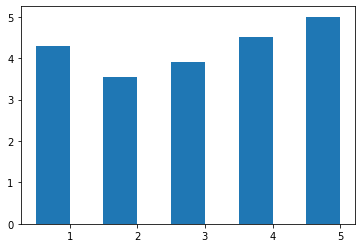

In [14]:
# 4. Creating Bars
# Positions of the left sides of the 5 bars. [0.75, 1.75, 2.75, 3.75, 4.75]
import matplotlib.pyplot as plt
from numpy import arange
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

bar_heights = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5) + 0.75
fig, ax = plt.subplots()
ax.bar(bar_positions, bar_heights, 0.5)
plt.show()

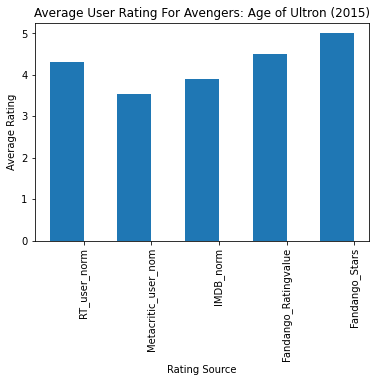

In [19]:
# 5. Aligning Axis Ticks and Labels
import matplotlib.pyplot as plt
from numpy import arange
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue',
            'Fandango_Stars']

bar_heights = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5) + 0.75
tick_positions = range(1,6)
fig, ax = plt.subplots()

ax.bar(bar_positions, bar_heights, 0.5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(num_cols, rotation=90)

ax.set_xlabel('Rating Source')
ax.set_ylabel('Average Rating')
ax.set_title('Average User Rating For Avengers: Age of Ultron (2015)')
plt.show()

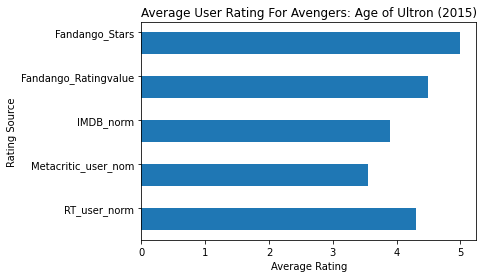

In [22]:
# 6. Horizontal Bar Plot
import matplotlib.pyplot as plt
from numpy import arange

num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

bar_widths = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5) + 0.75
tick_positions = range(1,6)
fig, ax = plt.subplots()
ax.barh(bar_positions, bar_widths, 0.5)

ax.set_yticks(tick_positions)
ax.set_yticklabels(num_cols)
ax.set_ylabel('Rating Source')
ax.set_xlabel('Average Rating')
ax.set_title('Average User Rating For Avengers: Age of Ultron (2015)')
plt.show()

From the horizontal bar plot, we can more easily determine that the 2 average scores from Fandango users are higher than those from the other sites. While bar plots help us visualize a few data points to quickly compare them, they aren't good at helping us visualize many data points.

The line charts we generated always connected points from left to right. This helped us show the trend, up or down, between each point as we scanned visually from left to right. Instead, we can avoid using lines to connect markers and just use the underlying markers. A plot containing just the markers is known as a scatter plot.

![title](img/ScatterPlots_1.png)

The scatter plot suggests that there's a weak, positive correlation between the user ratings on Fandango and the user ratings on Rotten Tomatoes. The correlation is weak because for many x values, there are multiple corresponding y values. The correlation is positive because, in general, as x increases, y also increases.

When using scatter plots to understand how 2 variables are correlated, it's usually not important which one is on the x-axis and which one is on the y-axis. This is because the relationship is still captured either way, even if the plots look a little different. If you want to instead understand how an independent variable affects a dependent variables, you want to put the independent one on the x-axis and the dependent one on the y-axis. Doing so helps emphasize the potential cause and effect relation.

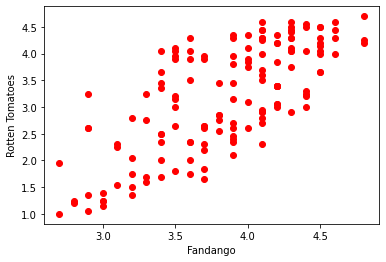

In [30]:
# 7. Scatter plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(norm_reviews['Fandango_Ratingvalue'], 
           norm_reviews['RT_user_norm'], c='red')

ax.set_xlabel('Fandango')
ax.set_ylabel('Rotten Tomatoes')
plt.show()

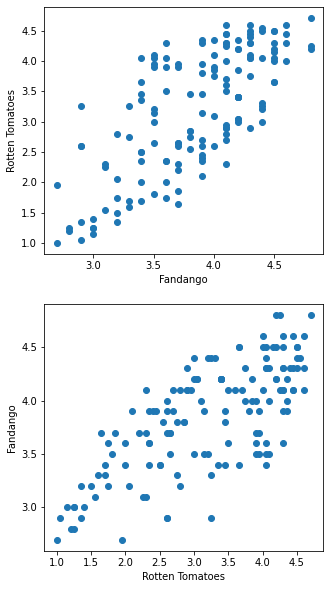

In [3]:
# 8. Switching axes
import matplotlib.pyplot as plt
import pandas as pd

fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

reviews = pd.read_csv('../../datasets/fandango_scores.csv')
cols = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
norm_reviews = reviews[cols]

ax1.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax1.set_xlabel('Fandango')
ax1.set_ylabel('Rotten Tomatoes')
ax2.scatter(norm_reviews['RT_user_norm'], norm_reviews['Fandango_Ratingvalue'])
ax2.set_xlabel('Rotten Tomatoes')
ax2.set_ylabel('Fandango')
plt.show()



By default, matplotlib uses the minimal ranges for the data limits necessary to display all of the data we specify. By manually setting the data limits ranges to specific ranges for all plots, we're ensuring that we can accurately compare. We can even use the methods we just mentioned to zoom in on a part of the plots. For example, the following code will limit the axes to the 4 to 5 range:

`ax.set_xlim(4, 5)`

`ax.set_ylim(4, 5)`

This makes small changes in the actual values in the data appear larger in the plot. A difference of 0.1 in a plot that ranges from 0 to 5 is hard to visually observe. A difference of 0.1 in a plot that only ranges from 4 to 5 is easily visible since the difference is 1/10th of the range.

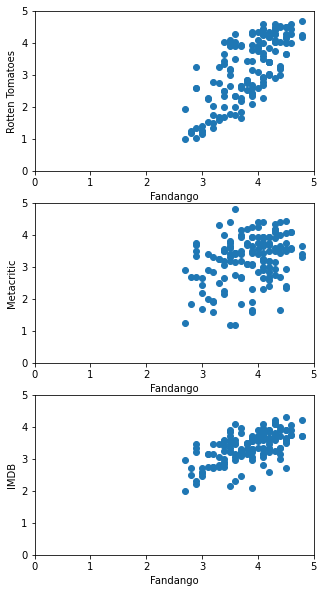

In [4]:
#9. BenchMarking CoRelation
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax1.set_xlabel('Fandango')
ax1.set_ylabel('Rotten Tomatoes')
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 5)

ax2.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['Metacritic_user_nom'])
ax2.set_xlabel('Fandango')
ax2.set_ylabel('Metacritic')
ax2.set_xlim(0, 5)
ax2.set_ylim(0, 5)

ax3.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['IMDB_norm'])
ax3.set_xlabel('Fandango')
ax3.set_ylabel('IMDB')
ax3.set_xlim(0, 5)
ax3.set_ylim(0, 5)

plt.show()

From the scatter plots, we can conclude that user ratings from Metacritic and Rotten Tomatoes span a larger range of values than those from IMDB or Fandango. User ratings from Metacritic and Rotten Tomatoes range from 1 to 5. User ratings from Fandango range approximately from 2.5 to 5 while those from IMDB range approximately from 2 to 4.5.

#### The scatter plots unfortunately only give us a cursory understanding of the distributions of user ratings from each review site. For example, if a hundred movies had the same average user rating from IMDB and Fandango in the dataset, we would only see a single marker in the scatter plot. 